In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [109]:
data=pd.read_csv("Microsoft Stocks.csv")

data

,Date,Price,Open,High,Low,Volume
0,05/15/2023,309.46,309.10,309.90,307.59,16290000
1,05/12/2023,308.97,310.55,310.65,306.60,19770000
2,05/11/2023,310.11,310.10,311.12,306.26,31680000
3,05/10/2023,312.31,308.62,313.00,307.67,30080000
4,05/09/2023,307.00,308.00,310.04,306.31,21340000
...,...,...,...,...,...,...
9364,03/20/1986,0.10,0.10,0.10,0.09,58440000
9365,03/19/1986,0.10,0.10,0.10,0.10,47890000
9366,03/18/1986,0.10,0.10,0.10,0.10,66470000
9367,03/17/1986,0.10,0.10,0.10,0.10,133169999


In [110]:
# 将日期设为索引

data["Date"]=pd.to_datetime(data.Date)
data.index=data['Date']
data.drop('Date', axis=1,inplace=True)
data

,Price,Open,High,Low,Volume
Date,,,,,
2023-05-15,309.46,309.10,309.90,307.59,16290000
2023-05-12,308.97,310.55,310.65,306.60,19770000
2023-05-11,310.11,310.10,311.12,306.26,31680000
2023-05-10,312.31,308.62,313.00,307.67,30080000
2023-05-09,307.00,308.00,310.04,306.31,21340000
...,...,...,...,...,...
1986-03-20,0.10,0.10,0.10,0.09,58440000
1986-03-19,0.10,0.10,0.10,0.10,47890000
1986-03-18,0.10,0.10,0.10,0.10,66470000


             Price    Open    High     Low    Volume  Normalized
Date                                                            
2023-05-15  309.46  309.10  309.90  307.59  16290000    0.901901
2023-05-12  308.97  310.55  310.65  306.60  19770000    0.900472
2023-05-11  310.11  310.10  311.12  306.26  31680000    0.903796
2023-05-10  312.31  308.62  313.00  307.67  30080000    0.910209
2023-05-09  307.00  308.00  310.04  306.31  21340000    0.894729


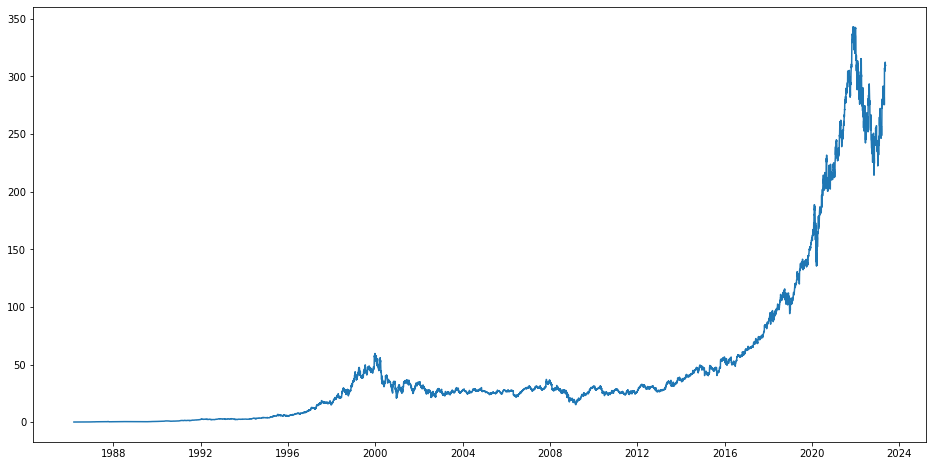

In [111]:
# 去除缺失值
data = data.dropna()

# 标准化数据
scaler = MinMaxScaler()
data['Normalized'] = scaler.fit_transform(data[['Price']])

# 打印处理后的数据
print(data.head())

plt.figure(figsize=(16,8))
plt.plot(data["Price"],label='Close Price history')

In [114]:
# 划分特征和目标变量
X = data.drop('Price', axis=1)  # 特征
y = data['Price']  # 目标变量

# 划分训练集和测试集
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印训练集和测试集的大小
print("训练集大小:", train_X.shape, train_y.shape)
print("测试集大小:", test_X.shape, test_y.shape)

训练集大小: (7495, 5) (7495,)
测试集大小: (1874, 5) (1874,)


In [115]:
# 定义滑动窗口大小和步长
window_size = 60
stride = 10

# 创建输入序列和输出序列
inputs = train_X
outputs = []

for i in range(0, len(df) - window_size + 1, stride):
    inputs.append(data['Value'].iloc[i:i + window_size].values)
    outputs.append(data['Value'].iloc[i + window_size])

# 将输入序列和输出序列转换为DataFrame
inputs = pd.DataFrame(inputs)
outputs = pd.Series(outputs, name='Output')

# 打印输入序列和输出序列
print("输入序列:")
print(inputs)
print("输出序列:")
print(outputs)

输入序列:
              Open    High     Low     Volume  Normalized
Date                                                     
2002-03-19   31.09   31.50   30.75   36380000    0.090432
2017-09-20   75.35   75.55   74.31   21590000    0.218209
2021-10-27  316.00  326.10  316.00   52590000    0.941869
2011-12-21   26.01   26.19   25.44   64129999    0.074835
2004-12-23   26.86   27.15   26.83   65819999    0.078479
...            ...     ...     ...        ...         ...
2000-07-31   35.09   35.56   34.62   70280000    0.101510
2002-10-01   22.12   23.12   21.59  110980000    0.067110
2001-12-14   33.01   33.98   32.97   43000000    0.098041
2019-12-12  151.65  153.44  151.02   24650000    0.446475
1994-06-30    3.23    3.26    3.19   40830000    0.009154

[7495 rows x 5 columns]
输出序列:
Series([], Name: Output, dtype: float64)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16296\1384003011.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  outputs = pd.Series(outputs, name='Output')
